In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
import imageio
from PIL import Image
import cv2

from skimage import color
from skimage import io
from skimage.color import gray2rgb

# from scipy.misc import imread
# from pylab import imshow, show

Shape of the original image (1536, 1992, 3)


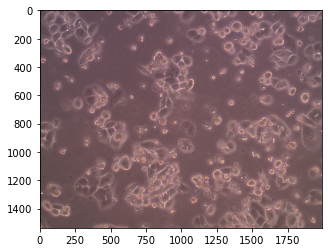

In [2]:
# TEST

# img = Image.open('../data/par1/par1_001.jpg')
img = Image.open('../data/wt/wt_001.jpg')
# img.show()

img = np.asarray(img)
imshow(img)
print("Shape of the original image",img.shape)

In [3]:
img

array([[[ 89,  74,  81],
        [ 88,  73,  80],
        [ 87,  71,  82],
        ...,
        [139, 115, 128],
        [135, 115, 127],
        [131, 115, 126]],

       [[ 86,  75,  79],
        [ 88,  73,  80],
        [ 87,  71,  82],
        ...,
        [144, 116, 128],
        [141, 115, 128],
        [139, 115, 128]],

       [[ 88,  75,  82],
        [ 88,  72,  83],
        [ 88,  70,  84],
        ...,
        [149, 117, 132],
        [148, 116, 129],
        [149, 119, 129]],

       ...,

       [[164, 125, 118],
        [163, 129, 119],
        [171, 134, 125],
        ...,
        [100,  84,  84],
        [103,  84,  86],
        [101,  85,  86]],

       [[166, 125, 139],
        [167, 131, 143],
        [173, 138, 144],
        ...,
        [106,  80,  89],
        [106,  80,  93],
        [105,  82,  92]],

       [[165, 128, 161],
        [165, 132, 161],
        [174, 135, 164],
        ...,
        [107,  80,  95],
        [107,  80,  99],
        [105,  80,  99]]

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.2989, 0.5870, 0.1140])
gray = rgb2gray(img)
gray.shape

(1536, 1992)

In [5]:
gray

array([[ 79.2741,  78.2742,  77.0293, ..., 123.6441, 122.3345, 121.0249],
       [ 78.7364,  78.2742,  77.0293, ..., 125.7256, 124.2419, 123.6441],
       [ 79.6762,  78.0292,  76.9692, ..., 128.2631, 127.0352, 129.0951],
       ...,
       [135.8466, 138.0097, 144.0199, ...,  88.774 ,  89.8987,  89.8879],
       [138.8384, 143.1153, 149.1317, ...,  88.7894,  89.2454,  90.0065],
       [142.8085, 145.1565, 149.9496, ...,  89.7723,  90.2283,  89.6305]])

In [7]:
backtorgb = gray2rgb(gray)
backtorgb = np.array(backtorgb, np.int32)
backtorgb.shape

(1536, 1992, 3)

In [8]:
backtorgb

array([[[ 79,  79,  79],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [123, 123, 123],
        [122, 122, 122],
        [121, 121, 121]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [123, 123, 123]],

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 76,  76,  76],
        ...,
        [128, 128, 128],
        [127, 127, 127],
        [129, 129, 129]],

       ...,

       [[135, 135, 135],
        [138, 138, 138],
        [144, 144, 144],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[138, 138, 138],
        [143, 143, 143],
        [149, 149, 149],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[142, 142, 142],
        [145, 145, 145],
        [149, 149, 149],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 89,  89,  89]]

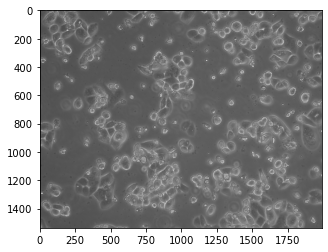

In [9]:
plt.imshow(backtorgb)

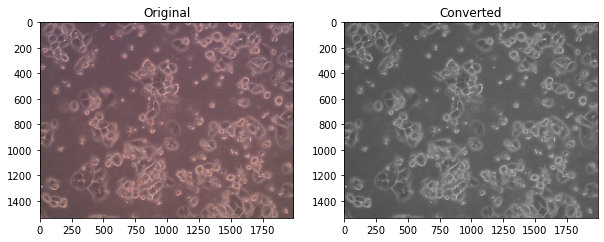

In [10]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].set_title('Original')
axs[0].imshow(img)

axs[1].set_title('Converted')
axs[1].imshow(backtorgb)

# axs[0,0]

plt.show()

In [11]:
# convert all the data
import glob
import matplotlib
from matplotlib import image
from matplotlib.image import imsave

# images = glob.glob('../data/par1/*.jpg')
images = glob.glob('../data/wt/*.jpg')
image_num = 1

for image in images:
    with open(image, "rb") as file:
        img_temp = Image.open(file)
        img_temp = np.asarray(img)
        conv_temp = rgb2gray(img_temp)
        conv =  np.array(conv_temp, np.int32)
#         save_name = '../data_grayscale/par1/par1_'+'{:03}'.format(image_num)+'.jpg'
        save_name = '../data_grayscale/wt/wt_'+'{:03}'.format(image_num)+'.jpg'
        # cv2 failed, too, because this reduced the image 2 dimension
        cv2.imwrite(save_name, conv)
#         conv.save(save_name,'JPEG')
# nono...this failed because this reconstruct rgb image
#         matplotlib.image.imsave(save_name, conv, cmap="gray")
        image_num +=1
#         print("All data were converted.")
        

In [43]:
# print('wether it works'+'{:03}'.format(1))

wether it works001


(1536, 1992)


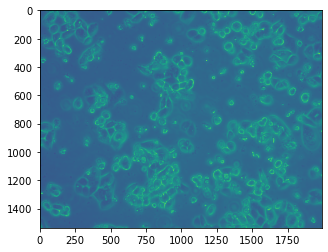

In [12]:
# test_img = Image.open("../data_grayscale/par1/par1_001.jpg")
test_img = Image.open("../data_grayscale/wt/wt_001.jpg")
test_img = np.asarray(test_img)
imshow(test_img)
print(test_img.shape)

In [13]:
test_img

array([[ 79,  78,  77, ..., 122, 124, 122],
       [ 78,  78,  77, ..., 127, 122, 123],
       [ 78,  78,  78, ..., 129, 125, 130],
       ...,
       [135, 138, 144, ...,  88,  88,  89],
       [138, 141, 152, ...,  89,  89,  89],
       [143, 146, 148, ...,  90,  90,  89]], dtype=uint8)

In [65]:
cv2.imwrite("backtorgb.jpg", backtorgb)

True

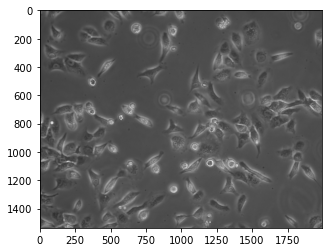

In [66]:
back=Image.open("backtorgb.jpg")
imshow(back)

In [69]:
back_array = np.asanyarray(back)
back_array

array([[[110, 110, 110],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 72,  72,  72]],

       [[106, 106, 106],
        [103, 103, 103],
        [108, 108, 108],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 72,  72,  72]],

       [[105, 105, 105],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [ 71,  71,  71],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       ...,

       [[ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [124, 124, 124],
        [114, 114, 114],
        [109, 109, 109]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [113, 113, 113],
        [123, 123, 123],
        [107, 107, 107]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [102, 102, 102],
        [109, 109, 109],
        [106, 106, 106]]